In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

position_mapping = {
    'ST': 'Forward',
    'CF': 'Forward',
    'RW': 'Forward',
    'LW': 'Forward',
    'CM': 'Midfielder',
    'CDM': 'Midfielder',
    'CAM': 'Midfielder',
    'RM': 'Midfielder',
    'LM': 'Midfielder',
    'CB': 'Defender',
    'LB': 'Defender',
    'RB': 'Defender',
    'LWB': 'Defender',
    'RWB': 'Defender',
    'GK': 'Goalkeeper'
}

In [2]:
df = pd.read_csv('./FIFA18_players_database/clean_data.csv')
df.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,69,60,60,68,54,48,58,41,58,30,...,55,43,57,67,48,58,58,46,36,RB
1,43,65,61,57,57,58,42,37,48,55,...,65,58,57,53,71,63,84,61,49,CDM
2,62,65,59,68,59,46,36,37,54,49,...,64,52,58,59,61,62,71,52,33,CDM
3,73,77,76,77,75,73,75,75,75,61,...,77,83,70,70,75,72,70,67,69,RB
4,73,69,66,57,74,74,76,74,74,46,...,73,74,76,78,76,77,74,64,57,RB


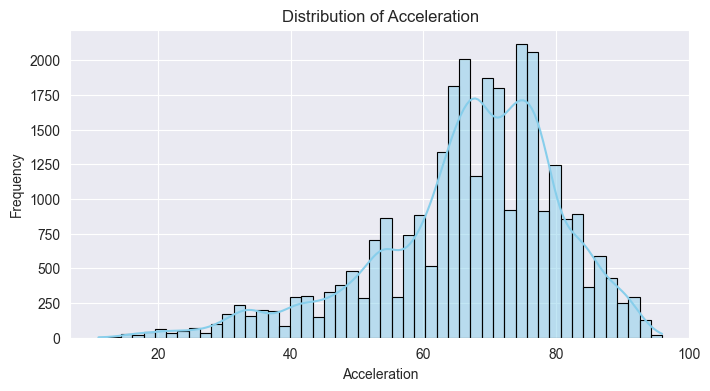

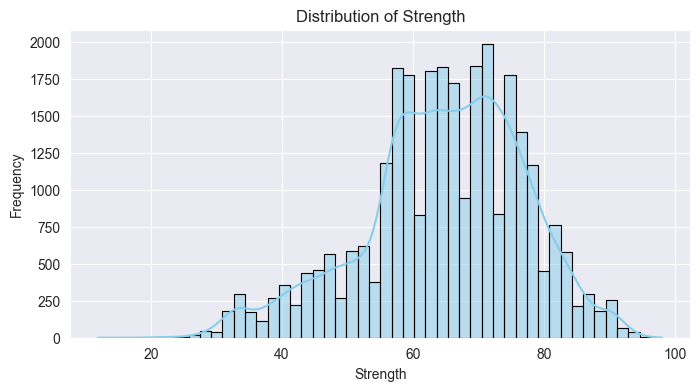

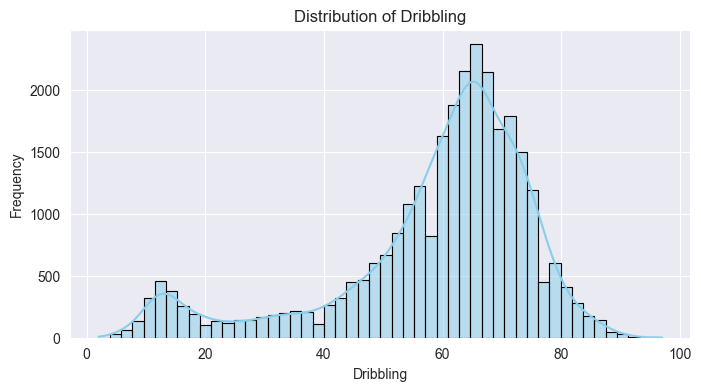

In [3]:
columns_to_plot = ['Acceleration', 'Strength', 'Dribbling']
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=50, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

All the distribution is right heavy, might not be good when we are feeding this to the Machine Learning Model.

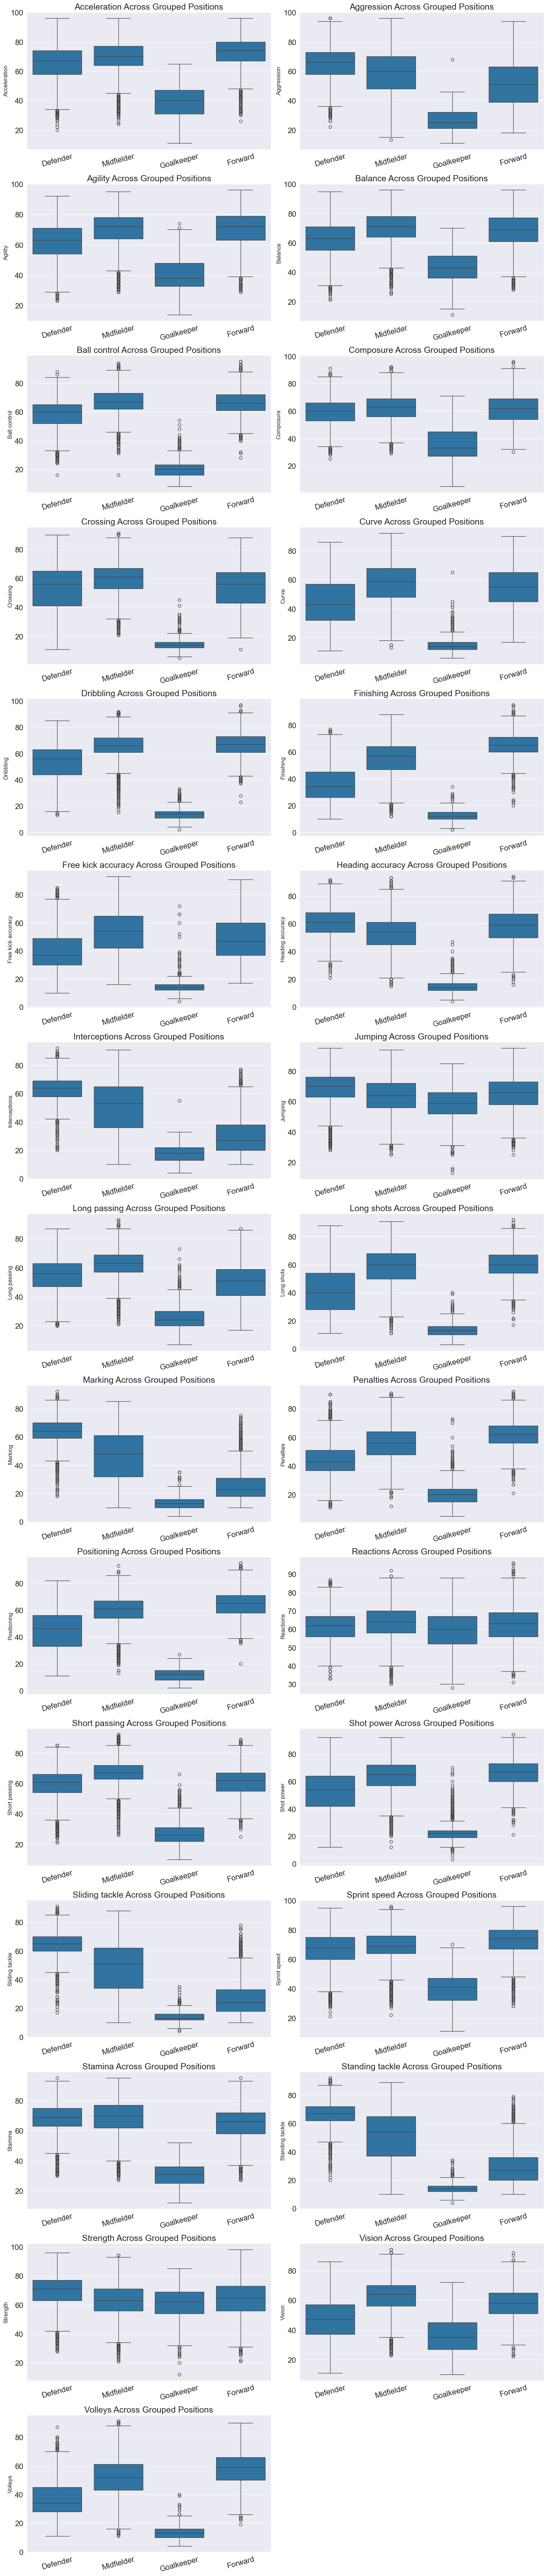

In [4]:
df['Grouped Positions'] = df['Preferred Positions'].map(position_mapping)

# Make a list of every column with a NUMERIC value 
numeric_columns = df.select_dtypes(include='number').columns

plots_per_row = 2

# Calculate rows and coloumns 
num_plots = len(numeric_columns)
num_rows = math.ceil(num_plots / plots_per_row)

# Make figure
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(16, num_rows * 5))
axes = axes.flatten()  # Make the axes to a list

# Loop to make all the plots
for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, x='Grouped Positions', y=column, ax=axes[i])
    axes[i].set_title(f'{column} Across Grouped Positions', fontsize=18)
    axes[i].set_xlabel('')  # Remove the label of the x axis
    axes[i].set_ylabel(column, fontsize=12)
    axes[i].tick_params(axis='x', rotation=15, labelsize=16)
    axes[i].tick_params(axis='y', labelsize=16)

# Remove useless boxplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()
plt.show()


We see that different positions has different types of strong attributes. Also the dots over and under the boxes shows that we have alot of outliers in some attributes.

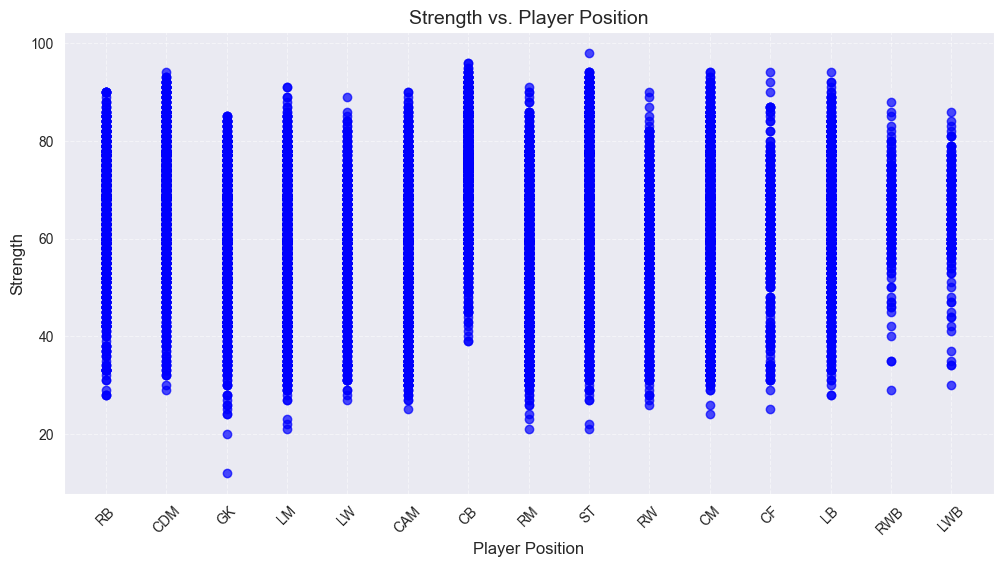

In [5]:
# Trying out scatter plotting
plt.figure(figsize=(12, 6))
positions = df['Preferred Positions'] # X
strength = df['Strength']  # Y

plt.scatter(positions, strength, alpha=0.7, color='blue')
plt.xlabel('Player Position', fontsize=12)
plt.ylabel('Strength', fontsize=12)
plt.title('Strength vs. Player Position', fontsize=14)
plt.xticks(rotation=45)  # Rotate X labels, better read ability
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

We can clearly see that Strength is a clear attribute for defensive positions.

In [6]:
df_Normal = pd.read_csv("./FIFA18_players_database/clean_data_normalized.csv")
df_Normal.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,0.550000,0.538462,0.406780,0.542373,0.270833,0.235294,0.507692,0.281690,0.372549,0.233766,...,0.255814,0.155172,0.5875,0.416667,0.078431,0.585366,0.379310,0.250000,0.3125,RB
1,0.116667,0.602564,0.423729,0.355932,0.333333,0.431373,0.261538,0.225352,0.176471,0.558442,...,0.488372,0.413793,0.5875,0.125000,0.529412,0.646341,0.827586,0.517857,0.4750,CDM
2,0.433333,0.602564,0.389831,0.542373,0.375000,0.196078,0.169231,0.225352,0.294118,0.480519,...,0.465116,0.310345,0.6000,0.250000,0.333333,0.634146,0.603448,0.357143,0.2750,CDM
3,0.616667,0.756410,0.677966,0.694915,0.708333,0.725490,0.769231,0.760563,0.705882,0.636364,...,0.767442,0.844828,0.7500,0.479167,0.607843,0.756098,0.586207,0.625000,0.7250,RB
4,0.616667,0.653846,0.508475,0.355932,0.687500,0.745098,0.784615,0.746479,0.686275,0.441558,...,0.674419,0.689655,0.8250,0.645833,0.627451,0.817073,0.655172,0.571429,0.5750,RB


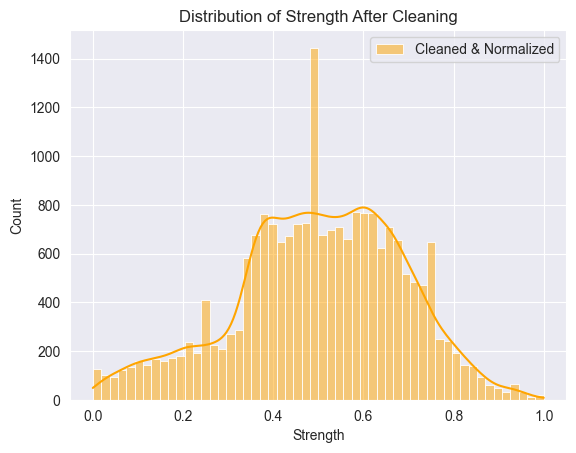

In [7]:
sns.histplot(df_Normal['Strength'], kde=True, color='orange', label='Cleaned & Normalized')
plt.legend()
plt.title('Distribution of Strength After Cleaning')
plt.show()

We see now after normalization and removing outliers that we have a more even graph

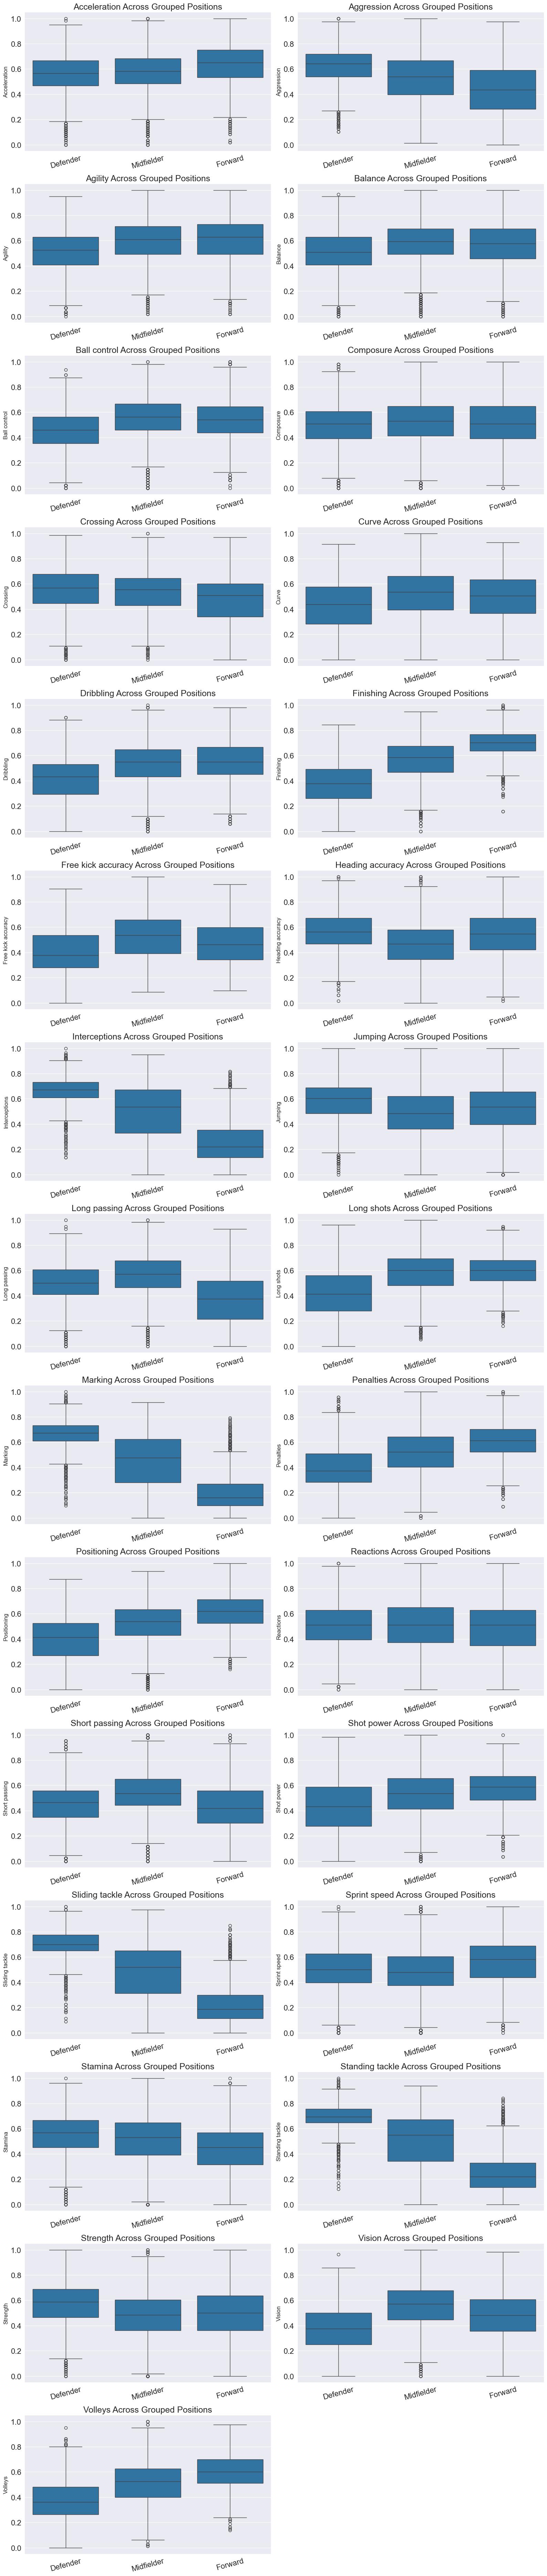

In [8]:
df_Normal['Grouped Positions'] = df_Normal['Preferred Positions'].map(position_mapping)

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(16, num_rows * 5))
axes = axes.flatten()  

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df_Normal, x='Grouped Positions', y=column, ax=axes[i])
    axes[i].set_title(f'{column} Across Grouped Positions', fontsize=18)
    axes[i].set_xlabel('')  
    axes[i].set_ylabel(column, fontsize=12)
    axes[i].tick_params(axis='x', rotation=15, labelsize=16)
    axes[i].tick_params(axis='y', labelsize=16)

if len(numeric_columns) < len(axes):
    for j in range(len(numeric_columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


We see now that the data has less or sometimes none outliers also the attributes for goalkeepers is gone because they were seen as a outlier.

In [9]:
df_Normal["Preferred Positions"].unique()

array(['RB', 'CDM', 'LM', 'LW', 'CAM', 'ST', 'CB', 'RW', 'CM', 'RM', 'CF',
       'LB', 'RWB', 'LWB'], dtype=object)

GK is removed